# Importing Necessary Modules

In [2]:
# Data manipulation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('housing.csv')

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
#Model related libraries
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [9]:
train_data = X_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11111,-117.90,33.84,31.0,2043.0,468.0,1524.0,454.0,3.5329,<1H OCEAN,187400.0
12883,-121.34,38.67,35.0,643.0,117.0,331.0,134.0,3.0417,INLAND,120700.0
15420,-117.26,33.21,26.0,1906.0,408.0,1325.0,427.0,3.0197,<1H OCEAN,136000.0
19652,-120.86,37.50,34.0,4272.0,996.0,2916.0,962.0,1.9829,INLAND,82800.0
6169,-117.93,34.09,37.0,1185.0,225.0,769.0,235.0,4.4625,<1H OCEAN,154200.0
...,...,...,...,...,...,...,...,...,...,...
1202,-121.69,39.36,34.0,842.0,186.0,635.0,165.0,1.8355,INLAND,63000.0
8958,-118.39,34.02,38.0,2521.0,647.0,1091.0,597.0,4.1296,<1H OCEAN,322900.0
5554,-118.40,33.96,44.0,1138.0,228.0,497.0,228.0,4.1852,<1H OCEAN,303300.0
19349,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,<1H OCEAN,246200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

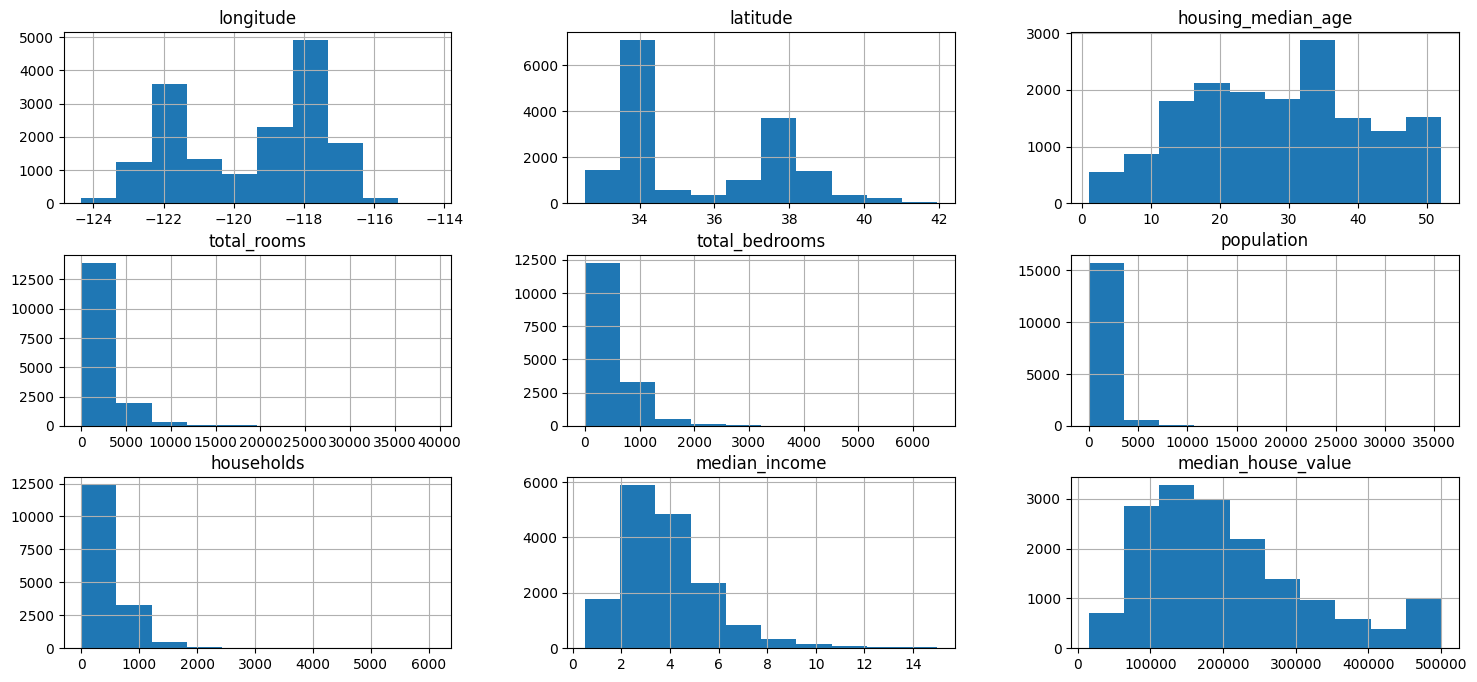

In [11]:
train_data.hist(figsize=(18,8))

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

ValueError: could not convert string to float: '<1H OCEAN'

<Figure size 1500x800 with 0 Axes>

In [13]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1) 
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1) 
train_data['population'] = np.log(train_data['population'] + 1) 
train_data['households'] = np.log(train_data['households'] + 1) 

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

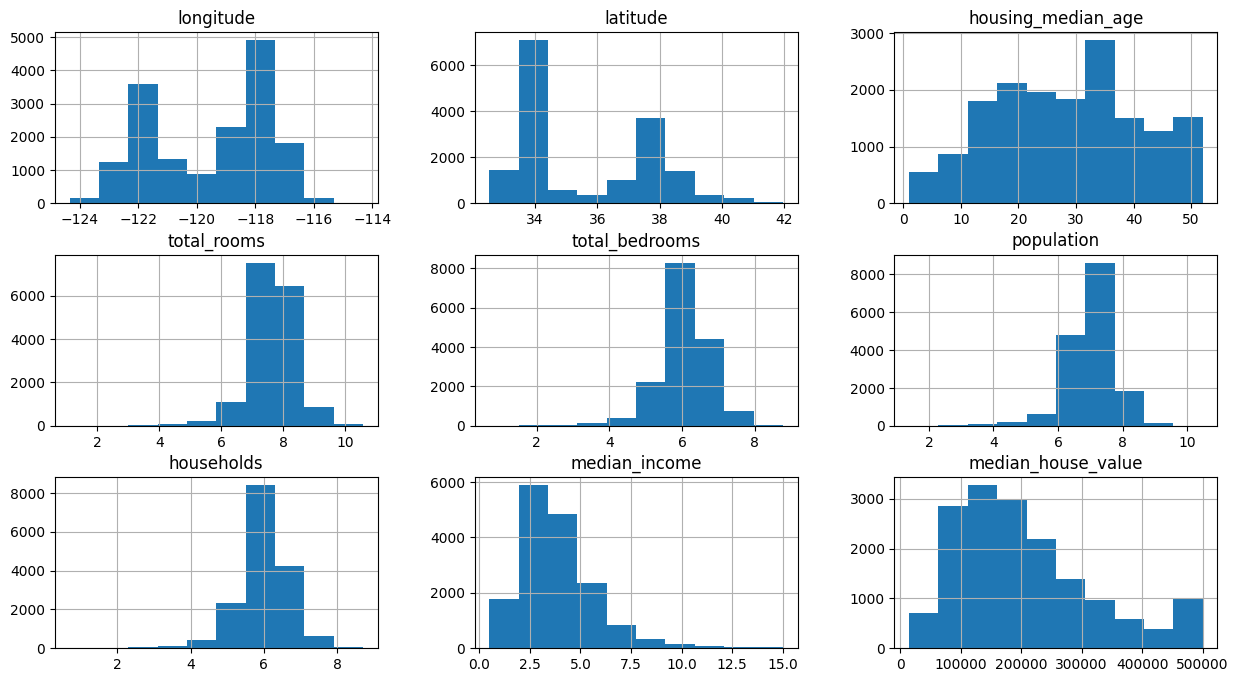

In [14]:
train_data.hist(figsize=(15,8))

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

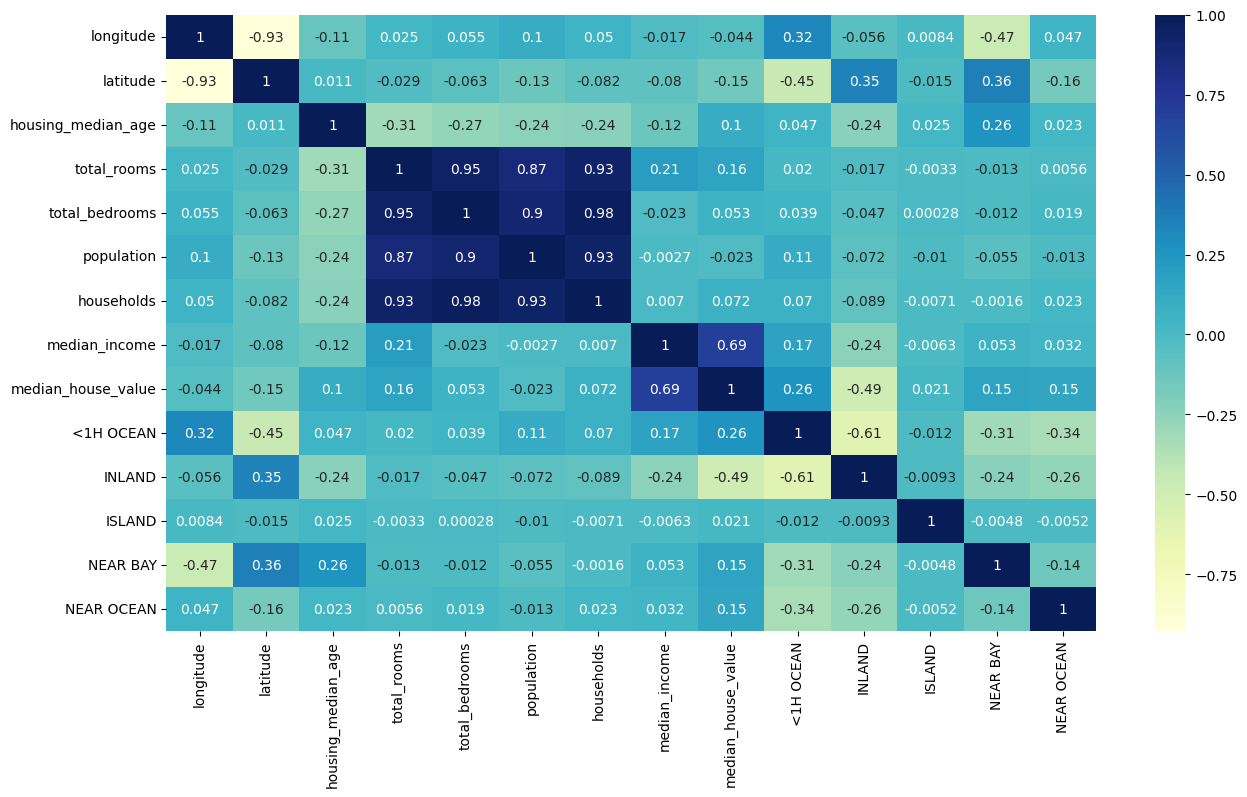

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

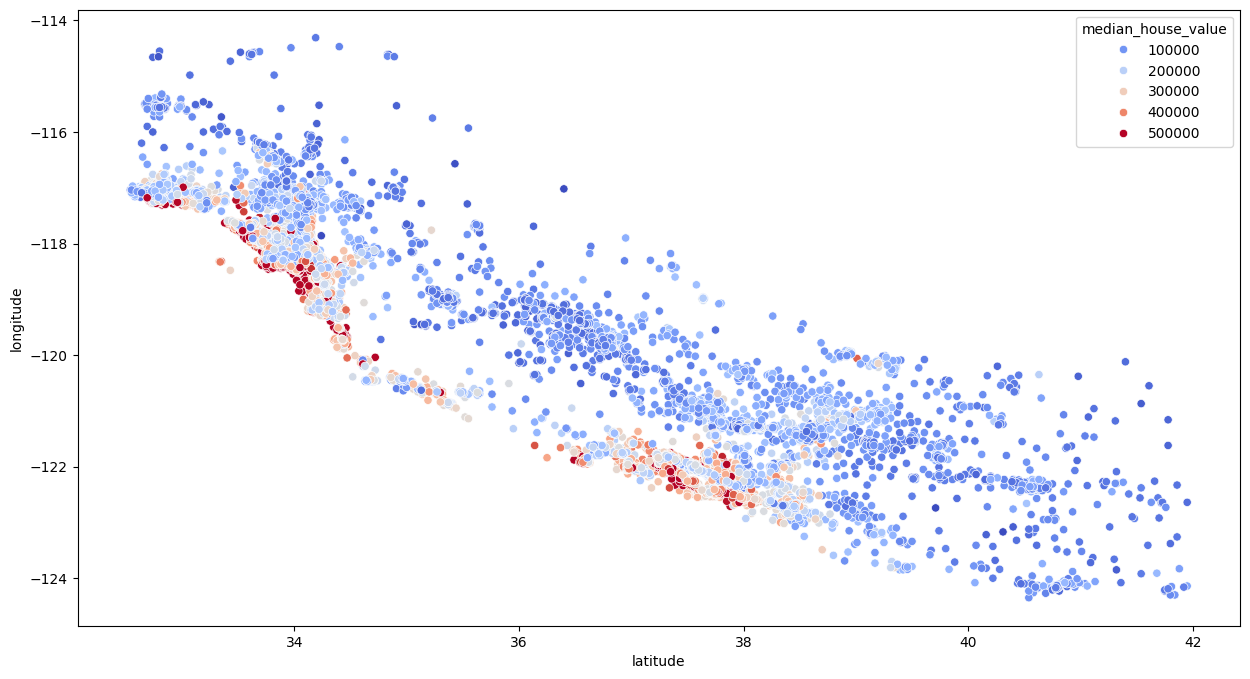

In [111]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [112]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

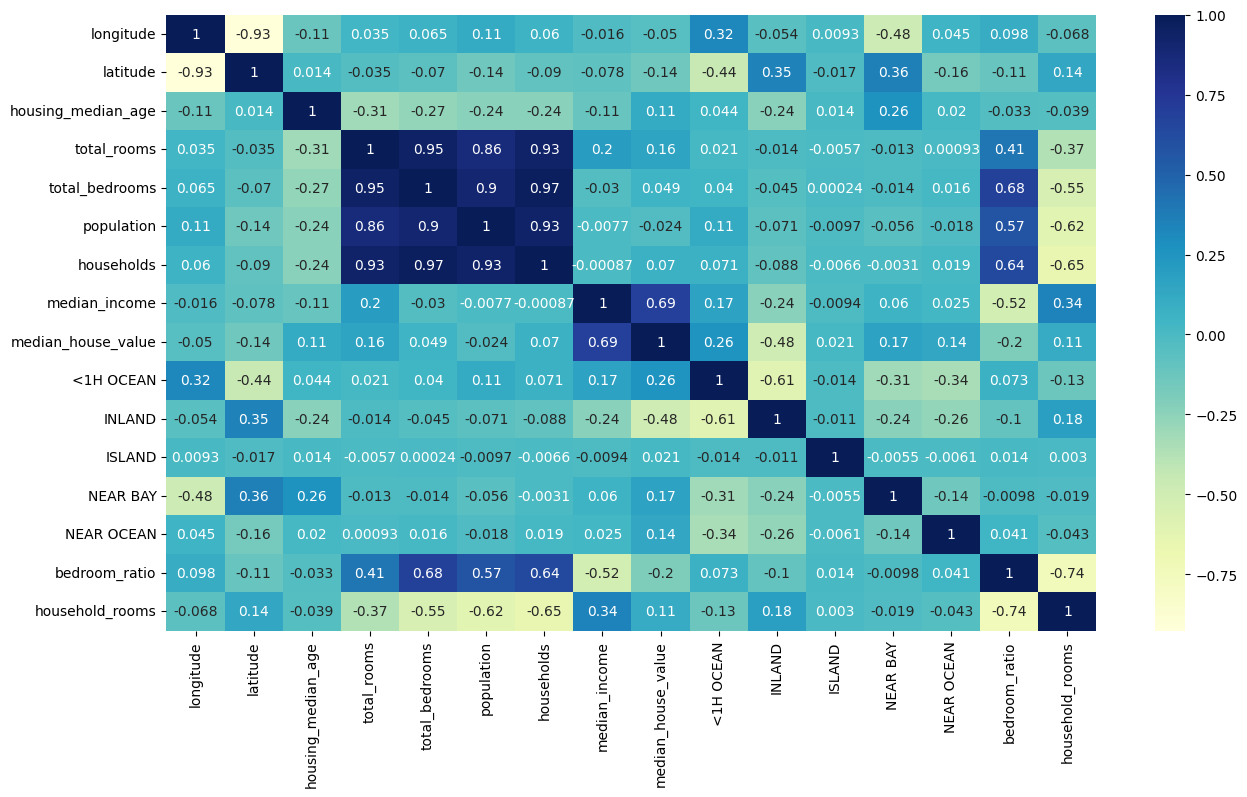

In [113]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

# Using Linear Regression Model

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [126]:
reg = LinearRegression()
scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

X_train_s = scaler.fit_transform(X_train)

reg.fit(X_train, y_train)

LinearRegression()

In [116]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1) 
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1) 
test_data['population'] = np.log(test_data['population'] + 1) 
test_data['households'] = np.log(test_data['households'] + 1) 

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [123]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [127]:
X_test_s = scaler.transform(X_test)

In [128]:
reg.score(X_test, y_test)

0.6809289753890415

# Using Random Forest Model

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [135]:
forest.score(X_test_s, y_test)

0.8191099623390121

In [136]:
from sklearn.model_selection import GridSearchCV

In [140]:
forest = RandomForestRegressor()

In [155]:
param_grid = {
    'n_estimators' : [100, 200, 300], 
    'max_depth' : [None, 4, 8], 
    'min_samples_split' : [2, 4]
}

In [156]:
grid_search = GridSearchCV(
    forest, 
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error', 
    return_train_score=True
)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
best_forest = grid_search.best_estimator_

In [151]:
best_forest.score(X_test, y_test)

0.8181629291955829